In [2]:
import os
os.chdir('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/Code/Library')

from math import log
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

from ExperimentFunc import exp_func, beta_gen_lasso
from Step1 import solve_beta_lasso
from Step2 import find_v_lasso
from Step3 import solve_omega, gw_l1, proj_l1_tan_cone, proj_l1_neg_tan_cone

from collections import namedtuple

from copy import deepcopy

In [3]:
Params = namedtuple('Params', ['step1', 'step2', 'step3'])

### <span style="color:purple">1) Cov(X) = I</span>

In [4]:
N = 100
n = 1000
p = 1000
Sigma_sqrt = np.eye(p)
noise_sd = 9
debias_idx = p - 1

cardi = 0.005
l1_bound = p*cardi  

param_set = Params([l1_bound], 
                   [l1_bound], 
                   [gw_l1, proj_l1_tan_cone, proj_l1_neg_tan_cone])

In [5]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_lasso, 
             solve_beta_lasso, 
             find_v_lasso, 
             solve_omega)

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [6]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

In [7]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

In [8]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

In [9]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save simulation results

In [12]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/identity_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/identity_z.npy', z)

###  <span style="color:purple">2) Cov(X) with bounded eigenvalues</span>

In [13]:
# other parameters are the same as cov=I case

# Generate a cov matrix with bounded eigenvalues
# generate eigenvalues
cov_eigv = np.random.uniform(low = 0.5, high = 3.0, size = (p,))
D_sqrt = np.diag(cov_eigv**0.5)
# generate an orthonormal matrix
a = np.random.normal(size = (p,p))
u, s, vh = np.linalg.svd(a.T@a, full_matrices=True)
# generate the square root of cov matrix 
Sigma_sqrt = D_sqrt @ u.T

In [14]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_lasso, 
             solve_beta_lasso, 
             find_v_lasso, 
             solve_omega)

iter: 0
The L2 error:  1.3962876226310679
iter: 1
The L2 error:  1.6212450931691846
iter: 2
The L2 error:  2.0616743380411924
iter: 3
The L2 error:  1.5616911140707654
iter: 4
The L2 error:  1.8082677891618741
iter: 5
The L2 error:  1.7406434035660443
iter: 6
The L2 error:  1.8438038521754558
iter: 7
The L2 error:  1.314664899672138
iter: 8
The L2 error:  1.8148460920957707
iter: 9
The L2 error:  1.519984447714861
iter: 10
The L2 error:  1.9547900423392612
iter: 11
The L2 error:  1.994564020477562
iter: 12
The L2 error:  1.2373164912321177
iter: 13
The L2 error:  2.1575959158303024
iter: 14
The L2 error:  1.7224620485742632
iter: 15
The L2 error:  1.6518950872393625
iter: 16
The L2 error:  1.6408013397132837
iter: 17
The L2 error:  2.086708087580271
iter: 18
The L2 error:  1.4507243116272948
iter: 19
The L2 error:  1.5699433813574555
iter: 20
The L2 error:  1.7705919949360067
iter: 21
The L2 error:  1.841979893635449
iter: 22
The L2 error:  2.0059532934806894
iter: 23
The L2 error:  1.

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [15]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  1.249862413704363


In [16]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  0.0832232017251741


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

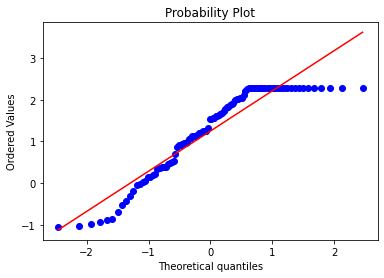

In [17]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

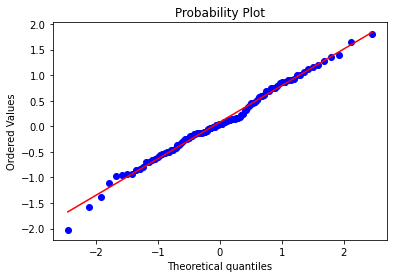

In [18]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [19]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/bddeig_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/bddeig_z.npy', z)

### <span style = 'color:purple'>3) Cov(X) is the Cov of AR(1) Process</span>

In [30]:
# other parameters are the same as cov=I case

# Generate the squar root of cov matrix
rho = 0.4
rho_vec = []
for i in range(p):
    rho_vec.append(rho**i)
rho_vec = np.array(rho_vec)
# The cholesky decomposition of cov == the squar root of cov
Sigma_sqrt = [rho_vec]
for i in range(1, p):
    rho_vec_shifted = np.concatenate((np.zeros(i), rho_vec[:-i]))
#     print(rho_vec_shifted)
    Sigma_sqrt.append(rho_vec_shifted * (1-rho**2)**0.5)
Sigma_sqrt = np.array(Sigma_sqrt)

In [31]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_lasso, 
             solve_beta_lasso, 
             find_v_lasso, 
             solve_omega)

iter: 0
The L2 error:  1.4151736825231735
iter: 1
The L2 error:  1.8331771773426064
iter: 2
The L2 error:  1.2564311675095525
iter: 3
The L2 error:  1.8777349428503398
iter: 4
The L2 error:  2.8526094483653446
iter: 5
The L2 error:  1.9689362063916973
iter: 6
The L2 error:  2.6821384574948937
iter: 7
The L2 error:  2.3361853453716295
iter: 8
The L2 error:  1.6417682597128638
iter: 9
The L2 error:  1.8273035112385507
iter: 10
The L2 error:  2.0094478905334965
iter: 11
The L2 error:  1.6340343337688603
iter: 12
The L2 error:  0.5331240279874784
iter: 13
The L2 error:  1.618860827657588
iter: 14
The L2 error:  1.4934864517786628
iter: 15
The L2 error:  2.6704601506769032
iter: 16
The L2 error:  2.3826547743567916
iter: 17
The L2 error:  1.544282918935122
iter: 18
The L2 error:  1.2190791789958304
iter: 19
The L2 error:  1.4560017790603321
iter: 20
The L2 error:  1.8865079912423361
iter: 21
The L2 error:  1.5695258914043817
iter: 22
The L2 error:  1.5340317418026732
iter: 23
The L2 error: 

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [32]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  0.504885491458776


In [33]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.06248970186385651


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

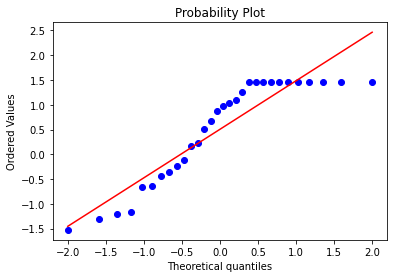

In [34]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

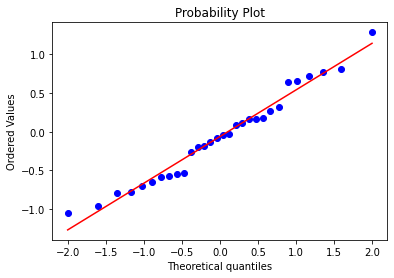

In [35]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Print out (debiased beta - beta) and (non-debiased beta - beta) 

In [28]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/ar1_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/Lasso/ar1_z.npy', z)